Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and University of Bristol ID:

In [1]:
NAME = "Mark Pearson"
UoB_ID = "ol18693"

---

# Homework 4

## Question 1 Fisher’s F-distribution

The F-distribution with parameters $n$ and $p$, denoted $F_{n,p}$, is the ratio of two independent $\chi^2$ random variables. Let $X \sim\chi_{n}^2$ and $Y\sim\chi_{p}^2$, then
$$ F_{n,p} = \frac{X/n}{Y/p}.$$

In [2]:
import numpy as np
from scipy.stats import f

1. Write a function `gen_f_density(n, p, x)` where `n` and `p` are parameters of the F-distribution and $x$ is an 1D `numpy.array` of arbitray length. The function `gen_f(n, p, x)` should output the density of $F_{n,p}$ at values in `x`. This output must also be a `numpy.array` of the same length as `x`.
1. Write a function `gen_f_quantile(n, p, q)` where `n` and `p` are parameters of the F-distribution and `q` is the quantile. The function `gen_f(n, p, q)` should output the percent point function of $F_{n,p}$. 

In [3]:
# Part 1

# YOUR CODE HERE
def gen_f_density(n,p,x):
    return f.pdf(x,n,p)



In [4]:
x = np.arange(0.1, 1, 0.1)

assert np.abs(gen_f_density(5, 30, x)[0] - 0.19842814) < 1e-8
assert np.abs(gen_f_density(1, 30, x)[0] - 1.18820228) < 1e-8



In [5]:
# Part 2

# YOUR CODE HERE
def gen_f_quantile(n, p, q):
    return f.ppf(q, n, p)

assert abs(gen_f_quantile(3,2,0.74)-3)<0.1
assert np.max(abs(gen_f_quantile(3,2, np.array([0.79,0.75]))-np.array([4,3.2]))) < 0.1

In [6]:
gen_f_quantile(3,2,0.74)-3

-0.0010891858858608217

In [7]:
assert np.abs(gen_f_quantile(1, 30, 0.95) - 4.170876785766691) < 1e-8



## Question 2 Student’s t-Test for Two Independent Samples

The indepedent sample t test is a statistical procedure used to compare the difference between two groups, the difference between the two population means, where the variance in one or both population(s) is unknown. More specifically, the two hypotheses are:

* $H_0$: $\mu_1 = \mu_2$
* $H_1$: $\mu_1 \ne \mu_2$,

where $\mu_1$ and $\mu_2$ are the mean of group 1 and 2, respectively.

The test statistic can be calculated using formula
$$t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{{S_1}^2}{n_1}+\frac{{S_2}^2}{n_2}}},$$
where $\bar X_i$, $S_i^2$ and $n_i$ is the mean, variance and size of sample $i$, $i=1,2$.

We seed the random number generator using `np.random.seed(1)`, and generate two `numpy.array`s of length 100 that are both distributed according to the standard normal distributions, named `sample1` and `sample2`.

1. Generate two `numpy.arrays`, named `data1` and `data2`, where the numbers on `data1` are normally distributed with mean 50 and variance 25, and the numbers on `data2` are normally distributed with mean 51 and variance 25. You should not call a random number generator for this. Rather, you should transform the variables `sample1` and `sample2`.
1. Write a function `find_t_stat(x1, x2)` that takes two samples contained in `numpy.array`s `x1` and `x2` as input, and outputs the t-statistic (defined above).
1. Write a function `t_test(x1, x2, alpha)` that takes  takes two samples contained in `numpy.array`s `x1` and `x2`, as well as `alpha` as input, and outputs a tuple of 3 values: the t-test statistic (you can use the function `find_t_stat(x1, x2)` you defined in the last part to compute this), critial value (for the given alpha) and the $p$-value. You can assume that the degree of freedom is the sum of the sizes of both samples minus 2. 



In [8]:
import numpy as np
import scipy.stats as stats
from scipy.stats import t
np.random.seed(1)
sample1 = np.random.randn(100)
sample2 = np.random.randn(100)

In [9]:
# YOUR CODE HERE
data1 = sample1*5 + 50
data2 = sample2*5 + 51

#tests
assert type(data1) == np.ndarray
assert type(data2) == np.ndarray
assert np.abs(np.mean(data1) - 50) < 1
assert np.abs(np.mean(data2) - 51) < 1
assert np.abs(np.std(data1) - 5) < 1
assert np.abs(np.std(data2) - 5) < 1

print("data1 mean: " + str(data1.mean()))
print("data1 std: " + str(data1.std()))
print("data2 mean: " + str(data2.mean()))
print("data2 std: " + str(data2.std()))

data1 mean: 50.30291426037849
data1 std: 4.4257810691579245
data2 mean: 51.763973888101
data2 std: 4.6599740872749775


In [10]:
assert np.abs(np.mean(data1) - 50) < 2
assert np.abs(np.mean(data2) - 50) < 2
assert np.abs(np.std(data1) - 5) < 1



In [11]:
# Part 2  
# YOUR CODE HERE
def find_t_stat(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    Var_1 = x1.var()
    Var_2 = x2.var()
    
    upper = x1.mean() - x2.mean()
    lower = (Var_1/n1 + Var_2/n2)**0.5
    t_stat = upper/lower
    
    
    return t_stat
    

#Test
x_1 = np.array([3,4,1])
x_2 = np.array([-2,-1,3,1])
assert abs(find_t_stat(x_1, x_2) - 2.0136) < 0.001

In [12]:
assert np.abs(np.abs(find_t_stat(data1, data2)) - 2.27) < 1e-2

In [13]:
# Part 3

# YOUR CODE HERE
def t_test(x1, x2, alpha):
    t_stat = find_t_stat(x1, x2)
    n1 = len(x1)
    n2 = len(x2)    
    v = n1 + n2 - 2
    p_value =2*t.cdf(-abs(t_stat), v)
    c_v = -t.ppf(alpha/2, v) #But with two tailed test their are two critical vaules a +ve and -ve
    return t_stat, c_v, p_value
    
#Tests
x_1 = np.array([3,4,1])
x_2 = np.array([-2,-1,3,1])
info = t_test(x_1,x_2, 0.2)
assert abs(info[0] - 2.0136) < 0.001 #t_stat
assert abs(info[1] - 1.476) < 0.001 #critical_value
assert abs(info[2] - 0.1002) < 0.001#p_value

In [14]:
print(t_test(data1, data2, 0.05))

(-2.2734095789227187, 1.972017477833896, 0.024074640682031006)


In [15]:
assert len(t_test(data1, data2, 0.05)) == 3
assert np.abs(t_test(data1, data2, 0.05)[0] - find_t_stat(data1, data2)) < 1e-10
assert np.abs(t_test(data1, data2, 0.05)[2] - 0.024) < 1e-3



# Question 3: The Lotka-Volterra equations
In the Canadian arctic, the main food of canadian lynx are snowshoe hares. While hares reproduce quickly (they are a type of rabbit, after all), if lynx predate too many hares, the population of hares crashes. This then leads to lynx having few to no kittens, and so the population of lynx reduces, allowing the hare population to recover. This in turns allows for more lynx kittens to survive and predation to rise again. Thise dynamics leads to a surprising phenomenon: **predator-prey population oscillations** in the lynx and hare numbers.

The simplest model of these predator-prey oscillations are the Lotka-Volterra equations:
Let $H$ be the density of hares in a region, and $L$ the corresponding density of lynx, both in dimensionless units. Then the dynamics of $h$ and $l$ are given by
\begin{align}
\frac{dH}{dt} &= b H - p H L \\
\frac{dL}{dt} &= - d L + r L H.
\end{align}
Here $b$ is the net birth rate of hares, $b>0$ always (they do breed like rabbits). The term $p H L$ expresses the rate of predation of hares by lynx, which reduces the hare population. The number of lynx decreases with their death rate $d$, but increases due to preying on hares with rate $r$.

## Part 1
Numerically integrate the Lotka-Volterra equations using a 4th order Runge-Kutta integrator. To make the remainder of this question work, please wrap your whole solution into a function which takes as arguments the Lotka-Volterra parameters, the initial conditions, the time step and the time interval, and returns arrays for hare and lynx populations. PLEASE USE THE TEMPLATE PROVIDED.

Run your function on the sample parameters $b=p=d=r=1$ with initial conditions $H = L = 0.5$ , and plot the results to make sure that it works, i.e. that you see oscillations.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

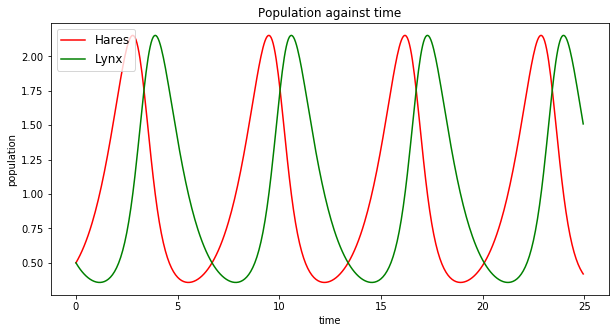

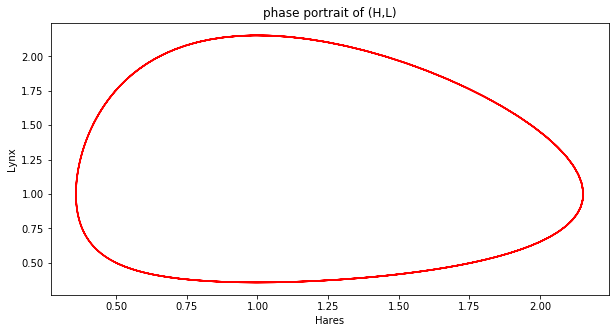

In [17]:
# Please COPY AND USE the following template for your answer (uncomment every line once)

# Put any extra functions above your main function
# Main function
class Func_Osc():
    def __init__(self,b,p,d,r):
        self.b = b # Hare birth rate
        self.p = p # Hares eaten rate
        self.d = d # Lynx death rate
        self.r = r # Lynx eating rate
    
    def f(self, H, L):
        f_H = self.b*H - self.p*H*L
        f_L = -self.d*L + self.r*L*H
        return np.array([f_H, f_L])
        
# # Arguments: the 4 parameters of the model, the initial hare and lynx populations, 
# # the time step and the integration time
def LotkaVolterra(b,p,d,r,H0,L0,dt,T):
    N = int(np.trunc(T/dt))
    H = np.zeros(N)
    L = np.zeros(N)
    t = np.zeros(N)
    H[0] = H0
    L[0] = L0
    
    f = Func_Osc(b,p,d,r).f
    
    for n in range(0,N-1):
        k_1_H, k_1_L = dt*f(H[n], L[n])
        k_2_H, k_2_L = dt*f(H[n] + k_1_H/2, L[n] + k_1_L/2)
        k_3_H, k_3_L = dt*f(H[n] + k_2_H/2, L[n] + k_2_L/2)
        k_4_H, k_4_L = dt*f(H[n] + k_3_H, L[n] + k_3_L)
        
        H[n+1] = H[n] + (k_1_H + 2*k_2_H + 2*k_3_H + k_4_H)/6
        L[n+1] = L[n] + (k_1_L + 2*k_2_L + 2*k_3_L + k_4_L)/6
        t[n+1] = t[n] + dt
    
    return t,H,L

# YOUR CODE HERE

my_cords = LotkaVolterra(1,1,1,1,0.5,0.5,0.05,25)
plt.figure(figsize=(10,5))
plt.plot(my_cords[0], my_cords[1], label = "Hares", color = "red")
plt.plot(my_cords[0], my_cords[2], label = "Lynx", color = "green")
plt.legend(loc='upper left', fontsize = 12)
plt.xlabel('time')
plt.ylabel('population')
plt.title("Population against time")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(my_cords[1], my_cords[2], color = "red")
plt.xlabel("Hares")
plt.ylabel("Lynx")
plt.title("phase portrait of (H,L)")
plt.show()


In [18]:
test_f = Func_Osc(3,4,1j,2).f
assert np.max(abs(test_f(1j,2) - np.array([-5j, 2j]))) == 0

In [19]:
# Basic test of your function. Make sure your syntax is right!
time,hare,lynx = LotkaVolterra(1,1,1,1,1,1,0.01,20)

assert (np.std(hare)<1e-14)
assert (np.std(lynx)<1e-14)

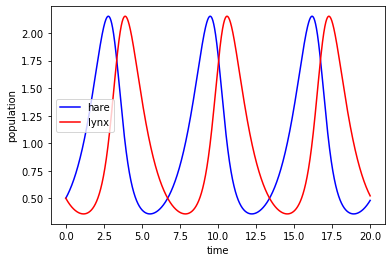

In [20]:
# Some more tests here. This includes a hidden one of the same nature, but with different parameters. 
time,hare,lynx = LotkaVolterra(1,1,1,1,0.5,0.5,0.001,20)
assert (abs(np.std(hare)-0.612)<1e-3)
assert (abs(np.std(lynx)-0.612)<1e-3)

# Not a test, just a visualisation to help you see what is happening
plt.figure()
plt.plot(time,hare,'-b',label='hare')
plt.plot(time,lynx,'-r',label='lynx')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()

# Checking order of parameters
time,hare,lynx = LotkaVolterra(0.5,1,1,2,0.5,0.5,0.001,20)
assert (np.std(hare)<1e-14)
assert (np.std(lynx)<1e-14)


## Part 2
The Lotka-Volterra equations are integrable, and in particular, there is a conserved quantity associated to them, which can be expressed as
\begin{equation} C = b \log L - p L -r H + d \log H, \end{equation}
where $\log$ is the natural logarithm, aka `np.log(x)`.

Write a function that computes the conserved quantity, if given the 4 parameters and initial conditions for H and L. To do this, you need to call your LotkaVolterra function from inside your new function, with the correct 4 parameters, and a suitable integration range (not too long) and time step (small). Then make it compute solutions, and then use these solutions to compute the $C$ vector. 

Check that $C$ is approximately constant by creating a plot inside your function (do not worry if there is a slight drift).
Finally, take the average of $C$. This is your result: make it the return argument of your function.

In [21]:
# Your answer here. Please use this TEMPLATE SOLUTION (uncomment every line once)
def conserved(b,p,d,r,H0,L0):
    # compute the Lotka-Volterra solution using the LotkaVolterra function
    t,H,L = LotkaVolterra(b,p,d,r,H0,L0,0.001,20)
    # compute the conserved quantity on the solution
    C = b*np.log(L) - p*L - r*H + d*np.log(H)
    # make a plot of the conserved quantity
    plt.figure()
    plt.plot(t,C, label = "Conserved", color = "orange")
    plt.legend()
    plt.show()
    # compute the mean value of the conserved quantity and return it
    cval = C.mean()
    return cval


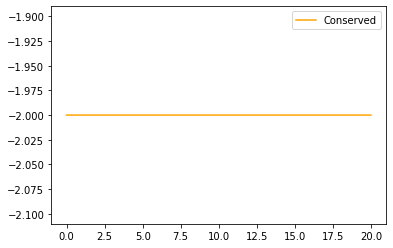

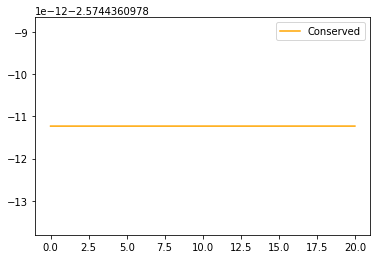

In [22]:
# Checking a couple of values for C. There is one hidden check here, of a similar nature.
cval = conserved(1,1,1,1,1.0,1.0)
assert abs(cval+2.0)<1e-14

cval = conserved(0.5,1,1,2,0.4,0.4)
assert (abs(cval+2.574)<1e-2)


## Part 3
For a given set of $b,p,h,l$, the amplitude of the predator-prey oscillations strongly depends on the initial conditions for the population. We will again choose $b=p=d=r=1$ for simplicity.

You task is now to construct a phase space plot of $H$ vs. $L$ (on the $y$ and $x$ axis, respectively), that combines several initial conditions on the same plot. Additionally, compute the value of $C$ for each initial condition. This will allow you to answer a couple of questions. 

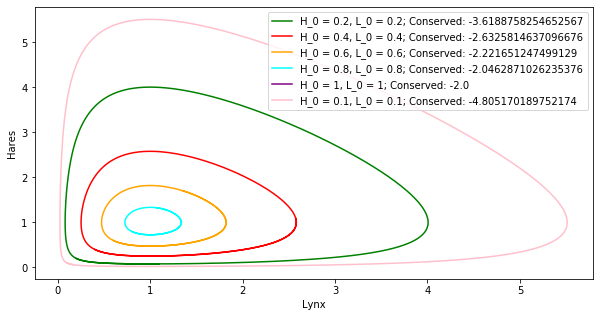

In [23]:
# A set of 5 initial conditions
Hini = [0.2,0.4,0.6,0.8,1,0.1]
Lini = [0.2,0.4,0.6,0.8,1,0.1]

# YOUR CODE HERE
b=1
p=1
d=1
r=1
colours = ["green", "red", "orange", "cyan", "purple", "pink"]

def con(H,L,b=1,p=1,d=1,r=1):
    C = b*np.log(L) - p*L - r*H + d*np.log(H)
    return C.mean()

plt.figure(figsize = (10,5))

for i in range(0, len(Hini)):
    H0 = Hini[i]
    L0 = Lini[i]
    t,H,L = LotkaVolterra(b,p,d,r,H0,L0,0.01,10)
    c_val = con(H,L,b,p,d,r)
    plt.plot(H,L, color = colours[i],
             label = "H_0 = " + str(H0) + ", L_0 = " + str(L0) + "; Conserved: " + str(c_val))

plt.ylabel("Hares")
plt.xlabel("Lynx")
#plt.plot([0,5],[1,1] , color = "black")
#plt.plot([1,1],[0,5] , color = "black")
plt.legend(loc = "upper right")
plt.show()
    
    
    


The purple ring above is not visible as it is on the point (1,1)

In [24]:
# Please fill in True or False

# 1. There is a stationary point of the equations at position (1,1).
stationary = True # There is also one at (0,0)
# 2. The amplitude of oscillations decreases when the initial condition moves away from the stationary point.
amplitude = False #The oscillations increase in size when initial conditions move awat from stationary point
#Assume talking about startionary point (1,1) not (0,0)
# 3. There is a minimum of C at the stationary point
minimum = False #it is a maximum
# 4. The initial condition H0 = L0 = 0.1 would have larger amplitude oscillations 
# and a smaller C than all of the plotted curves.
initial = True

# YOUR CODE HERE

In [25]:
# Checking your answers here (hidden, there is no other option :) ) 